<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-и-предобработка-данных" data-toc-modified-id="Подготовка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка и предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Подготовка и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
display(data.head())

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


**Мы вывели данные на экран и увидели первую проблему - данные склеились, поэтому нужно привести их в удобный для чтения и анализа вид.**

In [4]:
#прочтём файл ещё раз, указав в параметре sep, отвечающем за разделитель колонок, в качестве разделителя 
#знак табуляции \t

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Прежде чем приступать к исследованию, нужно разобраться с пропусками, проверить данные на дубликаты и аномалии. 

В некоторых столбцах нужно будет поменять тип данных. 

Также, бросается в глаза некорректное название столбцов cityCenters_nearest, parks_around3000, ponds_around3000 - нужно будет их переименовать. 
Переименуем столбцы cityCenters_nearest, parks_around3000, ponds_around3000 - нужно избавиться от прописной буквы, добавить в качестве разделителя между словами нижнее подчёркивание, чтобы все названия были в "змеином регистре", а также избавиться от цифр - они визуально выбиваются, к тому же не дают полной информации о столбце.

In [7]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_three_km', 
                            'ponds_around3000' : 'ponds_around_three_km'})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         14504 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            21796 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           2775 non-null   object 
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           21421 non-null  float64
 13  balcony                12180 non-null  float64
 14  locality_name          23650 non-null  object 
 15  ai

Проверим данные на наличие явных и неявных дубликатов.

In [9]:
data.duplicated().sum()

0

Явных дубликатов нет.
Теперь будем проверять данные на неявные дубликаты и пропуски, по ходу анализа каждого столбца будем по необходимости выполнять следующие пункты: 

* замена пропущенных значений 
* устранение аномальных значений 
* изменение типов данных 

In [10]:
#для проверки на неявные дубликаты мы применим к каждому столбцу следующие методы: 
#value_counts() для подсчёта уникальных значений, в параметрах к методу запишем dropna=False для включения в 
#подсчёт NaN значений
#метод sort_index с параметром ascending=True отсортирует данные в алфавитном порядке
#метод to_frame() выведет результат в формате Dataframe 

data['total_images'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,total_images
0,1059
1,872
2,640
3,769
4,986
5,1301
6,1482
7,1521
8,1585
9,1725


In [11]:
data['last_price'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,last_price
12190.0,1
430000.0,2
440000.0,1
450000.0,4
470000.0,3
...,...
300000000.0,1
330000000.0,1
401300000.0,1
420000000.0,1


In [12]:
#изменим тип данных в столбце с помощью метода astype()

data['last_price'] = data['last_price'].astype('int')
data['last_price'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,last_price
12190,1
430000,2
440000,1
450000,4
470000,3
...,...
300000000,1
330000000,1
401300000,1
420000000,1


In [13]:
data['total_area'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,total_area
12.0,1
13.0,3
13.2,1
14.0,1
15.0,2
...,...
590.0,1
618.0,1
631.0,1
631.2,1


In [14]:
data['first_day_exposition'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,first_day_exposition
2014-11-27T00:00:00,19
2014-11-29T00:00:00,1
2014-12-04T00:00:00,2
2014-12-05T00:00:00,1
2014-12-08T00:00:00,8
...,...
2019-04-29T00:00:00,37
2019-04-30T00:00:00,27
2019-05-01T00:00:00,30
2019-05-02T00:00:00,11


In [15]:
#изменим тип данных в столбце на datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,first_day_exposition
2014-11-27,19
2014-11-29,1
2014-12-04,2
2014-12-05,1
2014-12-08,8
...,...
2019-04-29,37
2019-04-30,27
2019-05-01,30
2019-05-02,11


In [16]:
data['rooms'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,rooms
0,197
1,8047
2,7940
3,5814
4,1180
5,326
6,105
7,59
8,12
9,8


In [17]:
data['ceiling_height'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,ceiling_height
1.00,1
1.20,1
1.75,1
2.00,11
2.20,1
...,...
27.00,8
27.50,1
32.00,2
100.00,1


Некоторые значения в этом столбце похожи на аномальные. Допустим, что высота потолков больше 4.5 метров и меньше 2.4 метров - это ошибки в данных, которые нужно исправить. 

In [18]:
#применим цикл for для замены аномальных значений для принятого нами минимума и максимума высоты потолков

import warnings

warnings.filterwarnings("ignore")

for abnormal_height in range(len(data['ceiling_height'])):
    if data['ceiling_height'][abnormal_height] > 4.50:
        data['ceiling_height'][abnormal_height] = 4.50 
    elif data['ceiling_height'][abnormal_height] < 2.40:
        data['ceiling_height'][abnormal_height] = 2.40  

In [19]:
#избавимся от пропусков, заменив их медианой и сделаем проверку, чтобы убедиться, что пропусков не
#осталось

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,ceiling_height
2.40,44
2.45,15
2.46,2
2.47,3
2.48,8
...,...
4.30,1
4.37,1
4.40,3
4.45,2


In [20]:
data['floors_total'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,floors_total
1.0,25
2.0,383
3.0,668
4.0,1200
5.0,5788
6.0,914
7.0,592
8.0,390
9.0,3761
10.0,1174


In [21]:
#заполним пропуски медианой и изменим тип данных в этом столбце на целочисленный

data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,floors_total
1,25
2,383
3,668
4,1200
5,5788
6,914
7,592
8,390
9,3847
10,1174


In [22]:
data['living_area'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,living_area
2.0,2
3.0,2
5.0,1
5.4,1
6.0,1
...,...
332.0,1
347.5,1
409.0,1
409.7,1


In [23]:
#заменим пропуски в столбце медианой 

data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['living_area'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,living_area
2.0,2
3.0,2
5.0,1
5.4,1
6.0,1
...,...
322.3,1
332.0,1
347.5,1
409.0,1


In [24]:
data['floor'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,floor
1,2917
2,3368
3,3073
4,2804
5,2621
6,1305
7,1218
8,1083
9,1051
10,687


In [25]:
data['is_apartment'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,is_apartment
False,2725
True,50
NaN,20924


In [26]:
#заполним пропуски следующим образом - добавим их к значениям False, так как если эти значения не указаны, то 
#скорее всего помещение не является апартаментами, поэтому пользователь его не вписал 

data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,is_apartment
False,23649
True,50


In [27]:
data['studio'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,studio
False,23550
True,149


In [28]:
data['open_plan'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,open_plan
False,23632
True,67


In [29]:
data['kitchen_area'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,kitchen_area
1.30,1
2.00,7
2.30,1
2.40,1
2.89,1
...,...
100.00,1
100.70,1
107.00,1
112.00,1


In [30]:
#заполним пропуски медианой 

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,kitchen_area
1.30,1
2.00,7
2.30,1
2.40,1
2.89,1
...,...
93.20,1
100.00,1
100.70,1
107.00,1


In [31]:
data['balcony'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,balcony
0.0,3758
1.0,4195
2.0,3659
3.0,81
4.0,183
5.0,304
NaN,11519


In [32]:
#заполним пропуски в этом столбце нулём, так как если пользователь не заполнил это значение, то скорее всего
#в квартире нет балконов
#после этого изменим тип данных в столбце на целочисленный 

data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,balcony
0,15277
1,4195
2,3659
3,81
4,183
5,304


In [33]:
#изучим этот столбец с помощью метода unique(), чтобы посмотреть и проанализировать все имеющиеся уникальные
#значения 

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [34]:
#напишем собственную функцию, с помощью которой оставим только названия населённых пунктов
#заполним пропущенные значения на Unknown
#выведем на экран результат для проверки

def locality_name_title(name):
    if type(name) != str:
        return name
    result = []
    temp = name.split()
    for index in range(len(temp)):
        if temp[index].istitle() == True:
            result.append(temp[index])
    return ' '.join(result)

data['locality_name'] = data['locality_name'].apply(locality_name_title)
data['locality_name'] = data['locality_name'].fillna('Unknown')
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [35]:
data['airports_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,airports_nearest
0.0,1
6450.0,2
6914.0,1
6949.0,1
6989.0,6
...,...
84006.0,1
84665.0,1
84853.0,1
84869.0,1


In [36]:
#заменим пропуски в этом столбце на медиану

data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['airports_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,airports_nearest
0.0,1
6450.0,2
6914.0,1
6949.0,1
6989.0,6
...,...
83758.0,1
84006.0,1
84665.0,1
84853.0,1


In [37]:
data['city_centers_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,city_centers_nearest
181.0,1
208.0,1
215.0,1
287.0,1
291.0,1
...,...
65105.0,1
65764.0,1
65952.0,1
65968.0,1


In [38]:
#заменим пропуски на медиану

data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())
data['city_centers_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,city_centers_nearest
181.0,1
208.0,1
215.0,1
287.0,1
291.0,1
...,...
64857.0,1
65105.0,1
65764.0,1
65952.0,1


In [39]:
data['parks_around_three_km'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,parks_around_three_km
0.0,10106
1.0,5681
2.0,1747
3.0,647
NaN,5518


In [40]:
#заполним пропуски: скорее всего парков в районе трёх километров нет, поэтому пользователь оставил пропуск при 
#заполнении; затем изменим тип данных на целочисленный

data['parks_around_three_km'] = data['parks_around_three_km'].fillna(value=0.0)
data['parks_around_three_km'] = data['parks_around_three_km'].astype('int')
data['parks_around_three_km'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,parks_around_three_km
0,15624
1,5681
2,1747
3,647


In [41]:
data['parks_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,parks_nearest
1.0,1
3.0,1
4.0,1
7.0,1
9.0,2
...,...
2984.0,1
3013.0,1
3064.0,1
3190.0,2


In [42]:
#заменим пропуски медианой 

data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['parks_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,parks_nearest
1.0,1
3.0,1
4.0,1
7.0,1
9.0,2
...,...
2905.0,1
2984.0,1
3013.0,1
3064.0,1


In [43]:
data['ponds_around_three_km'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,ponds_around_three_km
0.0,9071
1.0,5717
2.0,1892
3.0,1501
NaN,5518


In [44]:
#логика та же, что и в случае парков - заменим тип данных и заполним пропуски

data['ponds_around_three_km'] = data['ponds_around_three_km'].fillna(value=0.0)
data['ponds_around_three_km'] = data['ponds_around_three_km'].astype('int')
data['ponds_around_three_km'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,ponds_around_three_km
0,14589
1,5717
2,1892
3,1501


In [45]:
data['ponds_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,ponds_nearest
13.0,2
16.0,8
19.0,4
20.0,5
22.0,7
...,...
1313.0,1
1337.0,1
1341.0,2
1344.0,1


In [46]:
#заполним пропуски медианой

data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['ponds_nearest'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,ponds_nearest
13.0,2
16.0,8
19.0,4
20.0,5
22.0,7
...,...
1299.0,1
1313.0,1
1337.0,1
1341.0,2


In [47]:
data['days_exposition'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,days_exposition
1.0,1
2.0,3
3.0,158
4.0,176
5.0,152
...,...
1513.0,1
1553.0,1
1572.0,1
1580.0,1


In [48]:
#заполним пропуски медианой и изменим тип данных на целочисленный

data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int')
data['days_exposition'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,days_exposition
1,1
2,3
3,158
4,176
5,152
...,...
1512,2
1513,1
1553,1
1572,1


**Мы закончили работу с предобработкой данных. Подведём небольшой итог и опишем выбранные решения.**

*Заполнение пропущенных значений.*

При заполнении пропусков решили придерживаться следующей логики: так как нам доступно два типа данных (первые вписаны пользователем, вторые — получены автоматически на основе картографических данных), то часть значений могла быть потеряна из-за технических причин - это те данные, в которых указаны стоимость, удалённость, площадь и тд. В таких случаях мы заполнили пропуски медианой, которая более объективна, нежели среднее арифметическое. В других случаях мы предположили, что пропуски оставили пользователи, если каких-то атрибутов нет - количество балконов, наличие парков и прудов. В этих случаях мы заполнили пропуски нулём. 

*Изменение типов данных.*

Везде, где это позволяла логика, кроме одного столбца (с датой публикации) мы заменили тип данных на целочисленный - количество дней, этажей, балконов. В других данных решили не округлять, так как значения после плавающей точки могут быть важны (например, в площади квартиры, кухни, удалённости от центра, аэропортов и тд.).

## Расчёты и добавление результатов в таблицу

In [49]:
#рассчитаем и добавим в таблицу цену квадратного метра

data['square_meter'] = data['last_price'] / data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,455.0,0,502.0,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000


In [50]:
#рассчитаем и добавим в таблицу день недели, месяц и год публикации объявления

data['publication_day'] = data['first_day_exposition'].dt.day
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,square_meter,publication_day,publication_month,publication_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,95,120370.370370,7,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,455.0,0,502.0,81,82920.792079,4,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785.714286,20,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,6800.0,2,84.0,3,234.0,424,408176.100629,24,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000.000000,19,6,2018


In [51]:
#рассчитаем и добавим в таблицу этаж квартиры (нашими вариантами будут первый, последний и другой)
#для этого напишем функцию, которая разобьёт данные на нужные нам категории

def floor_number(number):
    floor = number['floor']
    floors_total = number['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor > 1 and floor != floors_total:
        return 'другой'
    elif floor == floors_total:
        return 'последний'
    
data['flat_floor_number'] = data.apply(floor_number, axis=1)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,square_meter,publication_day,publication_month,publication_year,flat_floor_number
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,95,120370.370370,7,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,455.0,0,502.0,81,82920.792079,4,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558,92785.714286,20,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,2,84.0,3,234.0,424,408176.100629,24,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121,100000.000000,19,6,2018,другой


In [52]:
#рассчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей

data['area_proportion'] = data['living_area'] / data['total_area'] 
data['kitchen_area_proportion'] = data['kitchen_area'] / data['total_area'] 
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_three_km,ponds_nearest,days_exposition,square_meter,publication_day,publication_month,publication_year,flat_floor_number,area_proportion,kitchen_area_proportion
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,95,120370.370370,7,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,502.0,81,82920.792079,4,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558,92785.714286,20,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,3,234.0,424,408176.100629,24,7,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,100000.000000,19,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

**Изучим площадь, цену, число комнат, высоту потолков с помощью метода describe(). После этого построим гистрограммы для каждого параметра.**

In [53]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

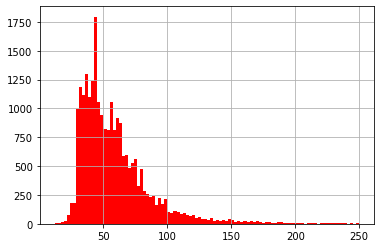

In [54]:
data['total_area'].hist(bins=100, color='red', range=(12, 250));

Судя по данным и гистограмме, большинство квартир имеют площадь от 30 до 60 квадратных метров. Пиковое значение - примерно 40 квадратных метров.

In [55]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [56]:
#по аналогии с тем, как мы избавились с аномалиями в столбце ceiling_height, поработаем с этим столбцом; отсеим слишком
#маленькую цену (12190) и заменим её на следующую в списке (430000), также уберём слишком высокую стоимость, установив 
#порог в 100000000

import warnings

warnings.filterwarnings("ignore")

for abnormal_price in range(len(data['last_price'])):
    if data['last_price'][abnormal_price] > 100000000:
        data['last_price'][abnormal_price] = 100000000 
    elif data['last_price'][abnormal_price] <= 12190:
        data['last_price'][abnormal_price] = 430000  

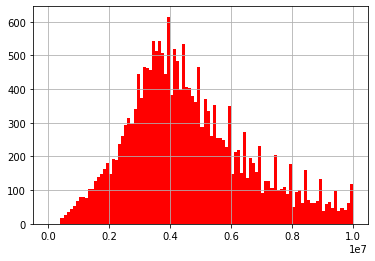

In [57]:
data['last_price'].hist(bins=100, color='red', range=(10, 10000000));

Изучив первичные данные, убрав аномалии и построив гистограмму, можно прийти к выводу, что стоимость большинства квартир лежит в промежутке от 3.5 до 4.5 миллионов. 

In [58]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

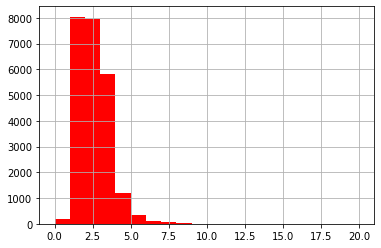

In [59]:
data['rooms'].hist(bins=20, color='red', range=(0, 20));

Судя по полученным данным, большинство квартир имеют от 1 до 3 комнат.

In [60]:
data['ceiling_height'].describe()

count    23699.00000
mean         2.69897
std          0.22558
min          2.40000
25%          2.60000
50%          2.65000
75%          2.70000
max          4.50000
Name: ceiling_height, dtype: float64

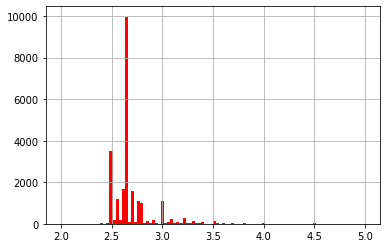

In [61]:
data['ceiling_height'].hist(bins=100, color='red', range=(2, 5));

Судя по полученным данным, большинство значений находится в промежутке от 2.5 до 3.0, там же - пиковое значение, то есть большее количество квартир имеют высоту потолка примерно 2.6 метров.  

**Изучим время продажи квартиры. Построим гистограмму и посчитаем среднее и медиану.**

In [62]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

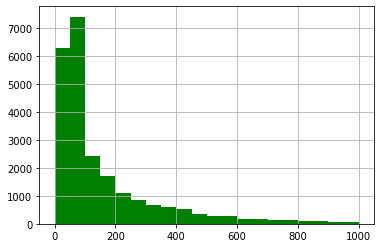

In [63]:
data['days_exposition'].hist(bins=20, color='green', range=(0, 1000));

In [64]:
data['days_exposition'].mean()

169.36022616988058

In [65]:
data['days_exposition'].median()

95.0

In [66]:
#проверим, до какого числа укладываются 80% значений, а то, что входит в оставшиеся 20% будем считать слишком 
#долгими продажами

np.quantile(data['days_exposition'], .80)

251.0

**80% продаж квартиры происходит максимум до 250 дней, другие 20% будем считать слишком долгими продажами.
Большинство продаж происходит от 50 до 100 дней**

**Теперь проверим, какие факторы больше всего влияют на стоимость квартиры. Изучим следующие параметры:**

- площадь
- число комнат
- удалённость от центра
- этаж 
- дата размещения (проверим отедьно день, месяц и год)

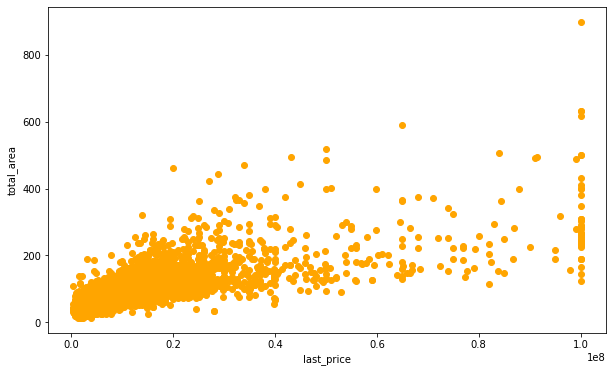

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['last_price'], y = data['total_area'], color='orange')
plt.xlabel("last_price")
plt.ylabel("total_area")

plt.show()

In [68]:
data['total_area'].corr(data['last_price'])

0.7740284750174576

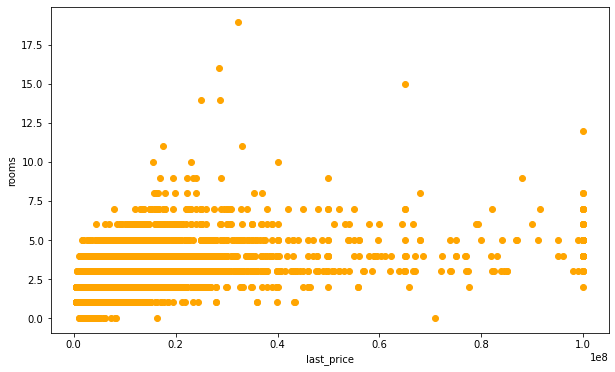

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['last_price'], y = data['rooms'], color='orange')
plt.xlabel("last_price")
plt.ylabel("rooms")

plt.show()

In [70]:
data['rooms'].corr(data['last_price'])

0.4632341424748133

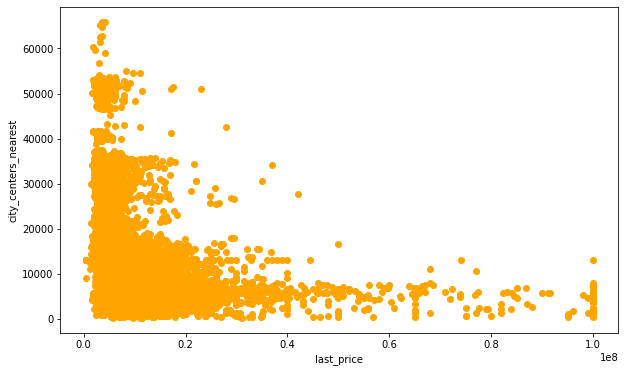

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['last_price'], y = data['city_centers_nearest'], color='orange')
plt.xlabel("last_price")
plt.ylabel("city_centers_nearest")

plt.show()

In [72]:
data['city_centers_nearest'].corr(data['last_price'])

-0.2557915348880056

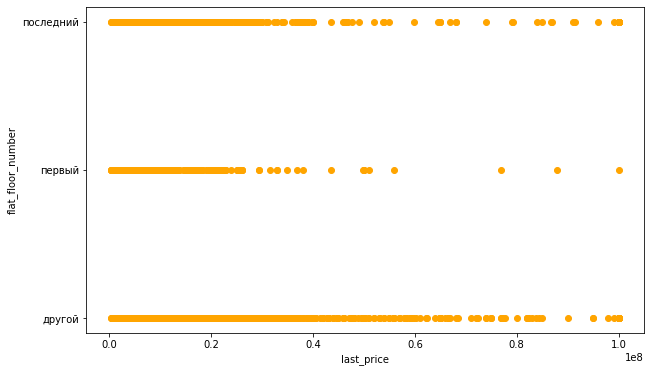

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['last_price'], y = data['flat_floor_number'], color='orange')
plt.xlabel("last_price")
plt.ylabel("flat_floor_number")

plt.show()

In [74]:
data['floor'].corr(data['last_price'])

0.029652097226942252

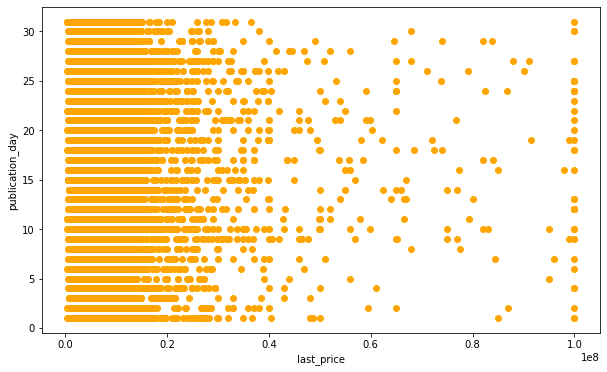

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['last_price'], y = data['publication_day'], color='orange')
plt.xlabel("last_price")
plt.ylabel("publication_day")

plt.show()

In [76]:
data['publication_day'].corr(data['last_price'])

0.00821779111011622

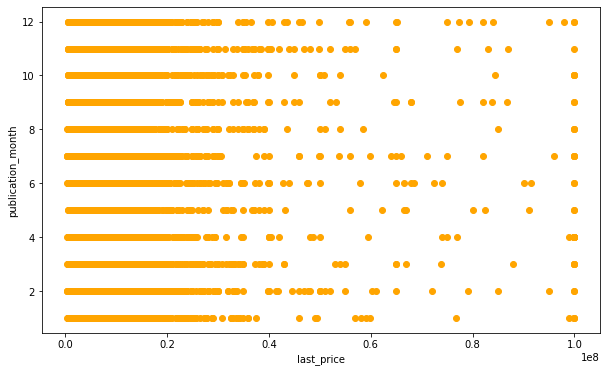

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['last_price'], y = data['publication_month'], color='orange')
plt.xlabel("last_price")
plt.ylabel("publication_month")

plt.show()

In [78]:
data['publication_month'].corr(data['last_price'])

0.0034918997546926583

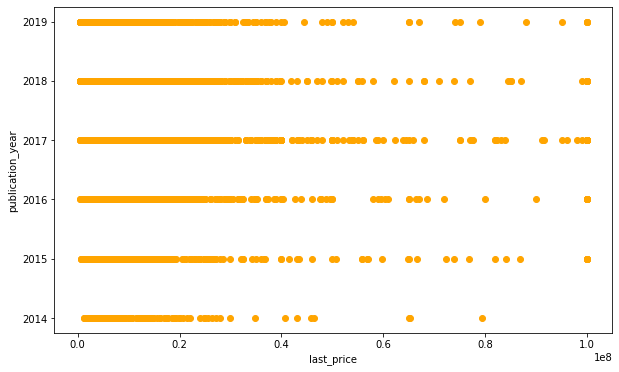

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['last_price'], y = data['publication_year'], color='orange')
plt.xlabel("last_price")
plt.ylabel("publication_year")

plt.show()

In [80]:
data['publication_year'].corr(data['last_price'])

-0.05602757890183

**По результатам исследования можно сделать несколько первичных выводов:** 

- стоимость квартиры в целом зависит от площади, но на цену могут повлиять и другие факторы
- зависимость стоимости от количества комнат есть, но корреляция слабая
- чем ближе к центру, тем стоимость больше, но незначительно (корелляция слабая), значит важны и другие факторы
- связи между стоимостью квартиры и тем, на каком этаже она находится, практически нет
- от дня недели и месяца зависит мало, а вот с годом ситуация иная - в 2014 квартиры стоили дороже

**Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.**

In [81]:
#в новой переменной сохраним сводную таблицу с нужными столбцами, отсортируем по убыванию и выведем на экран 
#нужные нам 10 значений

data_expo_count = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count')
data_expo_count = data_expo_count.sort_values(by='first_day_exposition', ascending=False).head(10)
display(data_expo_count)

,first_day_exposition
locality_name,
Санкт-Петербург,15721
Мурино,590
Кудрово,472
Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
Парголово,327
Гатчина,307


In [82]:
#используя полученные данные сделаем нужный срез и рассчитаем среднее значение стоимости квадратного метра 

data.query('locality_name == ["Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг"]').pivot_table(index='locality_name', values='square_meter')

,square_meter
locality_name,
Всеволожск,68654.473986
Выборг,58141.909153
Гатчина,68746.146763
Колпино,75424.579098
Кудрово,95324.930544
Мурино,86087.512050
Парголово,90175.913458
Пушкин,103125.819291
Санкт-Петербург,114849.008794


**По результатам проверки можно сделать следующий вывод:**

- самая высокая стоимость жилья в Санкт-Петербурге, в Кудрово и в Пушкине, а самая низкая - в Выборге, в Гатчине и во Всеволожске.

**Выделим квартиры в Санкт-Петербурге. Нам нужно будет проверить, какая область входит в центр и посмотреть, как цена будет зависеть от удалённости от центра.**

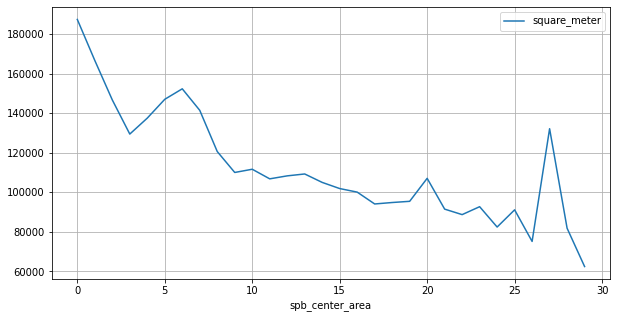

In [83]:
#создадим новый столбец, в котором сохраним перевод в километры и округление до целый значений столбца city_centers_nearest
#в новой переменной (она понадобится в дальнейшем) сохраним последовательность методов - нужный нам срез по Спб,
#сводную таблицу по новому столбцу и средним для цены за квадратный метр, график по нашим данным

data['spb_center_area'] = (data['city_centers_nearest'] / 1000).astype('int')
spb_center_area = data.query('locality_name == "Санкт-Петербург"')
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='spb_center_area', values='square_meter').plot(grid=True, figsize=(10, 5));

**Предположим, что область, входящая в центр - это срез от нуля до 7 км.**
Изучим сегмент квартир в центре по следующим параметрам: 

- площадь, цена, число комнат, высота потолков.

**Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) и сравним с общими данными.** 

In [84]:
#присоединим к нашей исходной таблице новую таблицу с данными по Санкт-Петербургу с помощью метода merge()

data.merge(spb_center_area, on='square_meter')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter,publication_day,publication_month,publication_year,flat_floor_number,area_proportion,kitchen_area_proportion,spb_center_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,95,120370.370370,7,3,2019,другой,0.472222,0.231481,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,502.0,81,82920.792079,4,12,2018,первый,0.460396,0.272277,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,92785.714286,20,8,2015,другой,0.612500,0.148214,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,234.0,424,408176.100629,24,7,2015,другой,0.188679,0.057233,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,100000.000000,19,6,2018,другой,0.320000,0.410000,8


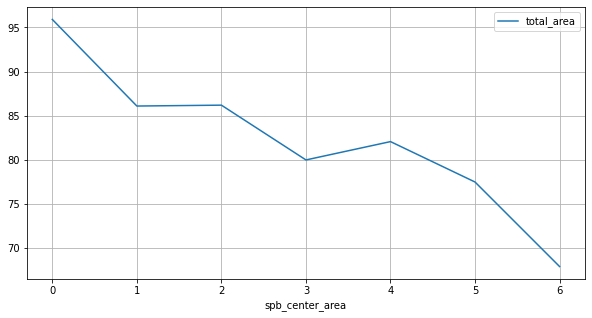

In [102]:
#возьмём нужный срез по центральной области и с помощью сводной таблицы и линейного графика проверим связь стоимости от 
#интересующих нас параметров

data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='spb_center_area', values='total_area', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [87]:
#проверим корреляцию

data['total_area'].corr(data['spb_center_area'])

-0.21445979062109954

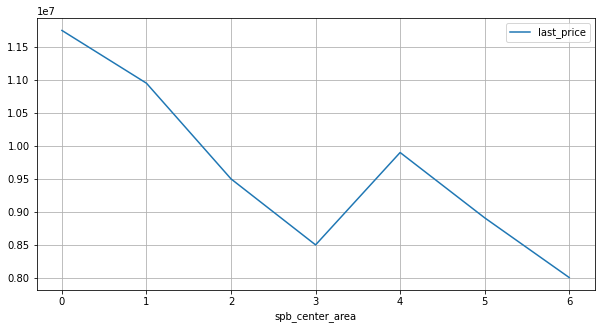

In [103]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='spb_center_area', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [90]:
data['last_price'].corr(data['spb_center_area'])

-0.26146964416927154

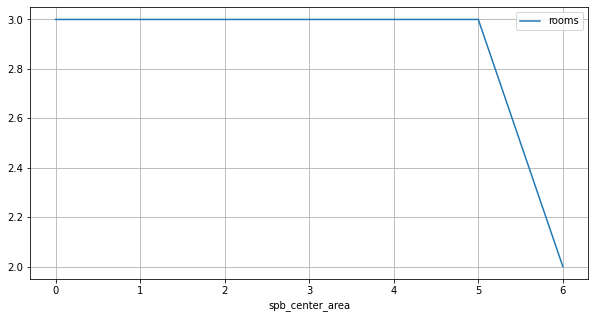

In [104]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='spb_center_area', values='rooms', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [92]:
data['rooms'].corr(data['spb_center_area'])

-0.16417313932608485

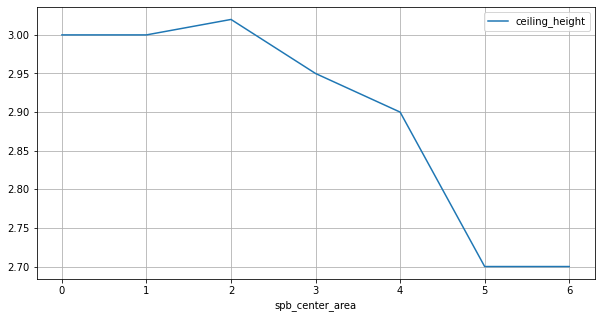

In [105]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='spb_center_area', values='ceiling_height', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [94]:
data['ceiling_height'].corr(data['spb_center_area'])

-0.26560478071476085

**Отрицательная корреляция для каждого из параметров говорит о том, что при увеличении одной переменной, вторая будет уменьшаться. В отношении наших данных это выглядит следующим образом:** 

 - чем ближе к центру, тем больше площадь 
 - чем ближе к центру, тем выше цена 
 - чем ближе к центру, тем больше комнат (при этом тут связь самая слабая)
 - чем ближе к центру, тем выше потолки 
 
**Теперь определим факторы, влияющие на стоимость квартиры.**

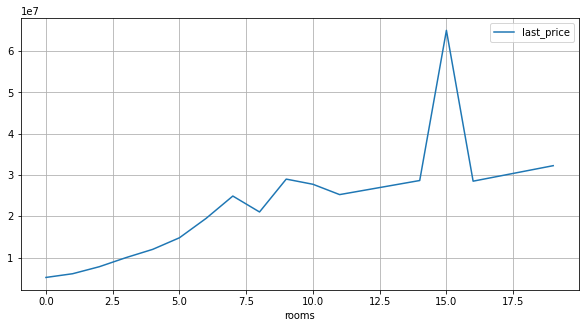

In [119]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5));

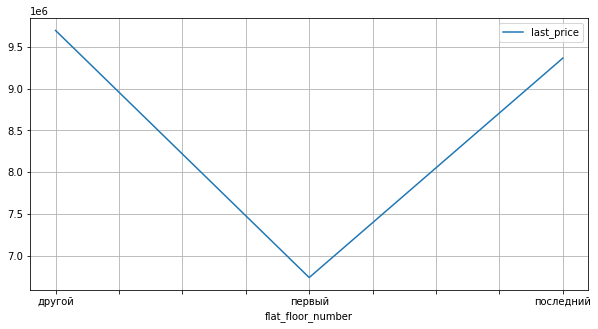

In [115]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='flat_floor_number', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5));

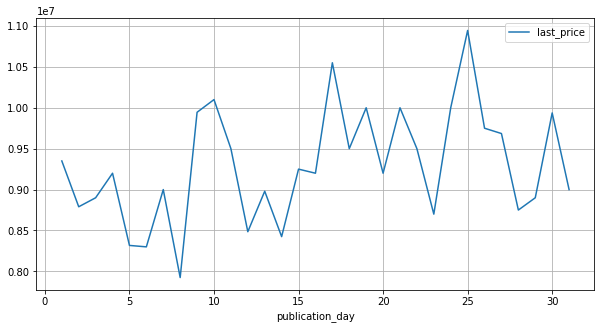

In [114]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='publication_day', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5));

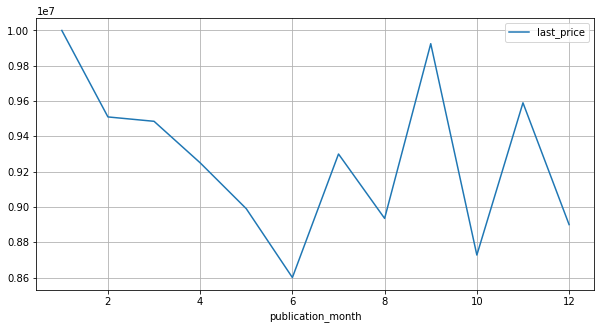

In [113]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='publication_month', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5));

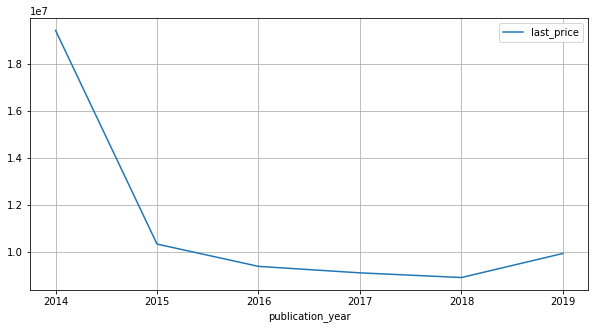

In [112]:
data.query('spb_center_area >=0 and spb_center_area <7').pivot_table(index='publication_year', values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5));

В целом, данные по Санкт-Петербургу не сильно отличаются от общих выводов по всей базе. 

На первом этаже стоимость чуть ниже; 

Чем больше комнат, тем выше цена;

10-го и 25-го числа стоимость выше, чем в другие дни;

В 9-ом месяце пик стоимости;

В 2014 стоимость была выше, чем в последующие годы. 

# Общий вывод

**По итогам исследования можно сделать вывод о том, что стоимость квартиры в целом зависит от площади и удалённости от центра, но на цену могут повлиять и другие факторы.** 

**Связи между стоимостью квартиры и тем, на каком этаже она находится, практически нет. В 2014-м году квартиры стоили дороже.**